# Data Visualization 1

***

## Project Description

The objectives of this peer review activity are to:

Create two sets of data visualizations using a pivot table with provided data in Microsoft Excel.

Compare and contrast the advantages and disadvantages of the two visualizations of your choice.

Explore ways to improve one of the visualizations you choose by applying fundamental data visualization principles from Module 4. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
from numpy import sum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("salesdata.csv",parse_dates=['date'])

In [3]:
df

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-02-01,Aubergine and Chickpea Vindaloo,10,4,0,32,19.14,43125.71,2,4,0,7,10,4,0,33,0,0,0,0,0,0
1,2018-02-01,Beef and Apple Burgers,28,13,0,367,2.79,57288.14,14,15,1,190,34,15,2,457,0,0,0,0,0,0
2,2018-02-01,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0,0,0
3,2018-02-01,Beef and Broccoli Stir Fry,8,10,0,77,2.88,62518.00,9,10,1,85,9,10,0,90,0,0,0,0,0,0
4,2018-02-01,Beef and Squash Kabob,18,7,1,149,1.78,72299.56,34,7,1,269,35,7,1,275,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,2018-12-31,Lamb Chops,21,8,1,164,12.94,50249.28,0,0,0,0,6,11,0,67,0,0,0,0,61,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
4608,2018-12-31,Salmon and Wheat Bran Salad,74,23,1,1587,2.62,53090.78,0,0,0,0,53,14,0,699,1,115,0,115,61,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4610 entries, 0 to 4609
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4610 non-null   datetime64[ns]
 1   lineitem            4610 non-null   object        
 2   quantity            4610 non-null   int64         
 3   price               4610 non-null   int64         
 4   discounts           4610 non-null   int64         
 5   nettotal            4610 non-null   int64         
 6   purchasenumber      4610 non-null   float64       
 7   dayssincelastpurch  4610 non-null   float64       
 8   quantity364         4610 non-null   int64         
 9   price364            4610 non-null   int64         
 10  discounts364        4610 non-null   int64         
 11  netTotal364         4610 non-null   int64         
 12  quantity28          4610 non-null   int64         
 13  price28             4610 non-null   int64       

In [5]:
df.describe()

,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
count,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00
mean,27.06,6.78,0.31,220.02,4.35,56248.36,29.44,6.72,0.30,239.01,27.19,6.64,0.29,221.92,26.88,6.68,0.31,218.54,34.57,0.98
std,23.02,4.92,1.02,306.44,4.17,15090.54,25.03,4.78,0.90,334.11,23.45,4.44,0.73,313.22,23.23,4.95,1.03,307.35,94.34,1.77
min,1.00,2.00,0.00,0.00,1.00,0.00,0.00,-5.00,0.00,-47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,2.00,0.00,49.00,2.30,48065.50,13.00,2.00,0.00,52.00,12.00,2.00,0.00,48.25,12.00,2.00,0.00,48.00,0.00,0.00
50%,20.00,7.00,0.00,103.00,3.17,56629.70,21.00,7.00,0.00,109.00,20.00,7.00,0.00,103.00,20.00,7.00,0.00,102.00,0.00,0.00
75%,34.00,10.00,0.00,249.00,4.70,66672.29,37.00,10.00,0.00,275.00,35.00,10.00,0.00,251.00,34.00,10.00,0.00,246.75,28.00,1.00
max,183.00,115.00,48.00,2839.00,70.00,99999.00,225.00,132.00,21.00,3176.00,183.00,50.00,17.00,2839.00,183.00,115.00,48.00,2839.00,895.00,14.00


In [6]:
df.columns

Index(['date', 'lineitem', 'quantity', 'price', 'discounts', 'nettotal', 'purchasenumber', 'dayssincelastpurch', 'quantity364', 'price364', 'discounts364', 'netTotal364', 'quantity28', 'price28', 'discounts28', 'netTotal28', 'quantity7', 'price7', 'discounts7', 'netTotal7', 'engagement', 'posts'], dtype='object')

In [7]:
df.shape

(4610, 22)

## Question 1 (10 points)

Pick three items from the menu (i.e., Beef and Broccoli is one menu item).

In [8]:
df["lineitem"].value_counts()

Salmon and Wheat Bran Salad        311
Beef and Apple Burgers             309
Beef and Broccoli                  309
Lamb Chops                         309
Beef and Broccoli Stir Fry         308
Beef and Squash Kabob              308
Chicken and Onion Kabob            308
Chutney                            308
Fountain Drink                     308
Lamb and Veggie Kabob              308
Naan                               308
Rice                               308
Yogurt                             308
Aubergine and Chickpea Vindaloo    300
Coconut and Beef Vindaloo          300
Name: lineitem, dtype: int64

In [9]:
df2 = df[(df["lineitem"] == "Naan")|(df["lineitem"] == "Rice")|(df["lineitem"] == "Yogurt")]
df2

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
11,2018-02-01,Naan,13,2,0,30,3.46,61688.77,13,2,0,21,12,2,0,36,0,0,0,0,0,0
12,2018-02-01,Rice,8,2,0,24,2.50,50076.25,11,2,0,20,13,2,0,36,0,0,0,0,0,0
14,2018-02-01,Yogurt,22,3,0,71,3.15,55104.50,13,3,1,42,22,3,0,70,0,0,0,0,0,0
26,2018-03-01,Naan,14,2,0,30,3.42,58453.17,12,2,0,26,9,2,0,20,11,2,0,22,0,0
27,2018-03-01,Rice,8,2,0,16,1.50,75023.50,6,2,0,12,25,2,0,64,9,2,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,2018-12-29,Rice,9,2,0,21,1.89,66769.78,18,2,0,56,9,2,0,24,7,2,0,18,254,1
4594,2018-12-29,Yogurt,32,3,0,145,2.37,63424.30,51,3,0,242,24,3,0,77,25,3,0,101,254,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1


In [10]:
df2.reset_index(inplace=True, drop=True)

In [11]:
df2

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-02-01,Naan,13,2,0,30,3.46,61688.77,13,2,0,21,12,2,0,36,0,0,0,0,0,0
1,2018-02-01,Rice,8,2,0,24,2.50,50076.25,11,2,0,20,13,2,0,36,0,0,0,0,0,0
2,2018-02-01,Yogurt,22,3,0,71,3.15,55104.50,13,3,1,42,22,3,0,70,0,0,0,0,0,0
3,2018-03-01,Naan,14,2,0,30,3.42,58453.17,12,2,0,26,9,2,0,20,11,2,0,22,0,0
4,2018-03-01,Rice,8,2,0,16,1.50,75023.50,6,2,0,12,25,2,0,64,9,2,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2018-12-29,Rice,9,2,0,21,1.89,66769.78,18,2,0,56,9,2,0,24,7,2,0,18,254,1
920,2018-12-29,Yogurt,32,3,0,145,2.37,63424.30,51,3,0,242,24,3,0,77,25,3,0,101,254,1
921,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
922,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1


In [12]:
df3 = df2.sort_values(by=['date'])
df3

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
78,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
79,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
80,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
150,2018-01-03,Naan,21,2,0,57,2.79,63249.84,24,2,0,62,23,2,0,76,20,2,0,52,32,2
151,2018-01-03,Rice,13,2,0,38,2.69,61593.85,15,2,0,43,20,2,0,69,20,2,1,59,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2018-12-29,Naan,9,2,0,28,2.78,77816.00,22,2,0,58,13,2,0,32,14,2,0,35,254,1
920,2018-12-29,Yogurt,32,3,0,145,2.37,63424.30,51,3,0,242,24,3,0,77,25,3,0,101,254,1
922,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
921,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1


In [13]:
df3.reset_index(inplace=True, drop=True)

In [14]:
df3

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
1,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
2,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
3,2018-01-03,Naan,21,2,0,57,2.79,63249.84,24,2,0,62,23,2,0,76,20,2,0,52,32,2
4,2018-01-03,Rice,13,2,0,38,2.69,61593.85,15,2,0,43,20,2,0,69,20,2,1,59,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2018-12-29,Naan,9,2,0,28,2.78,77816.00,22,2,0,58,13,2,0,32,14,2,0,35,254,1
920,2018-12-29,Yogurt,32,3,0,145,2.37,63424.30,51,3,0,242,24,3,0,77,25,3,0,101,254,1
921,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
922,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1


In [15]:
df4 = df3[:384]
df4

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
1,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
2,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
3,2018-01-03,Naan,21,2,0,57,2.79,63249.84,24,2,0,62,23,2,0,76,20,2,0,52,32,2
4,2018-01-03,Rice,13,2,0,38,2.69,61593.85,15,2,0,43,20,2,0,69,20,2,1,59,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2018-05-30,Naan,16,2,0,35,1.56,81303.81,13,2,0,30,29,2,0,82,16,2,0,33,0,0
380,2018-05-30,Rice,14,2,0,43,1.43,85832.50,14,2,0,42,15,2,0,50,15,2,0,31,0,0
381,2018-05-31,Naan,21,2,0,46,2.00,47852.48,37,2,0,81,16,2,0,52,21,2,0,67,0,0
382,2018-05-31,Rice,17,2,0,43,2.29,47235.18,35,2,0,90,16,2,0,48,14,2,0,39,0,0


In [16]:
pivot_table = df4.groupby(['date','lineitem'])['quantity','nettotal'].sum()
pivot_table

quantity  nettotal
date       lineitem                    
2018-01-02 Naan            23        76
           Rice            20        69
           Yogurt          30       101
2018-01-03 Naan            21        57
           Rice            13        38
...                       ...       ...
2018-05-30 Rice            14        43
           Yogurt          28        96
2018-05-31 Naan            21        46
           Rice            17        43
           Yogurt          41       159

[384 rows x 2 columns]

In [17]:
pivot_table.reset_index(inplace=True)

In [18]:
pivot_table

,date,lineitem,quantity,nettotal
0,2018-01-02,Naan,23,76
1,2018-01-02,Rice,20,69
2,2018-01-02,Yogurt,30,101
3,2018-01-03,Naan,21,57
4,2018-01-03,Rice,13,38
...,...,...,...,...
379,2018-05-30,Rice,14,43
380,2018-05-30,Yogurt,28,96
381,2018-05-31,Naan,21,46
382,2018-05-31,Rice,17,43


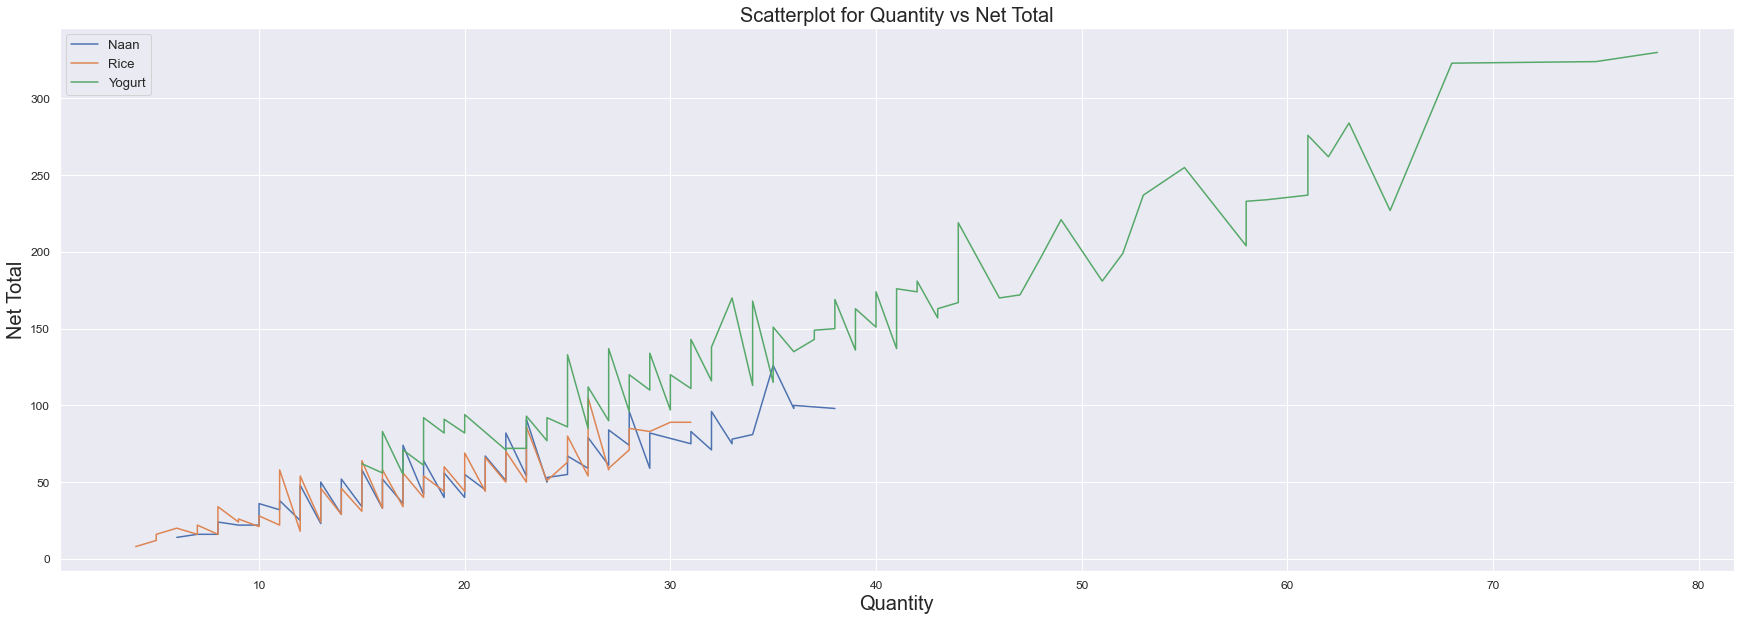

In [19]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=pivot_table.quantity,y=pivot_table.nettotal,hue=pivot_table.lineitem, data=pivot_table, estimator=None)
plt.title("Scatterplot for Quantity vs Net Total", fontsize=20)
plt.xlabel("Quantity", fontsize=20)
plt.ylabel("Net Total", fontsize=20)
plt.legend(['Naan','Rice','Yogurt'])
plt.show()

## Question 2 Part 1 (5 points)

Create a box plot with the data provided in the attached Excel sheet.

In [20]:
df2 = df[(df["lineitem"] == "Naan")|(df["lineitem"] == "Rice")|(df["lineitem"] == "Yogurt")| (df["lineitem"] == "Chutney")]
df2

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
6,2018-02-01,Chutney,12,2,0,26,7.08,41752.33,10,1,0,12,16,2,0,50,0,0,0,0,0,0
11,2018-02-01,Naan,13,2,0,30,3.46,61688.77,13,2,0,21,12,2,0,36,0,0,0,0,0,0
12,2018-02-01,Rice,8,2,0,24,2.50,50076.25,11,2,0,20,13,2,0,36,0,0,0,0,0,0
14,2018-02-01,Yogurt,22,3,0,71,3.15,55104.50,13,3,1,42,22,3,0,70,0,0,0,0,0,0
21,2018-03-01,Chutney,6,2,0,14,6.17,66685.50,21,2,0,44,18,2,0,48,12,2,2,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,2018-12-29,Yogurt,32,3,0,145,2.37,63424.30,51,3,0,242,24,3,0,77,25,3,0,101,254,1
4601,2018-12-31,Chutney,11,2,0,30,1.80,30230.20,0,0,0,0,11,2,0,30,0,0,0,0,61,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1


In [21]:
df3 = df2.sort_values(by=['date'])
df3

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
394,2018-01-02,Chutney,21,2,0,82,12.74,63182.89,32,2,0,73,14,2,0,40,16,2,0,55,0,0
399,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
400,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
402,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
754,2018-01-03,Chutney,14,2,0,48,4.67,41759.08,16,2,0,58,21,2,0,82,11,2,0,27,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,2018-12-29,Rice,9,2,0,21,1.89,66769.78,18,2,0,56,9,2,0,24,7,2,0,18,254,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
4601,2018-12-31,Chutney,11,2,0,30,1.80,30230.20,0,0,0,0,11,2,0,30,0,0,0,0,61,1


In [22]:
df3.reset_index(inplace=True, drop=True)

In [23]:
df3

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-01-02,Chutney,21,2,0,82,12.74,63182.89,32,2,0,73,14,2,0,40,16,2,0,55,0,0
1,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
2,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
3,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
4,2018-01-03,Chutney,14,2,0,48,4.67,41759.08,16,2,0,58,21,2,0,82,11,2,0,27,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2018-12-29,Rice,9,2,0,21,1.89,66769.78,18,2,0,56,9,2,0,24,7,2,0,18,254,1
1228,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
1229,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
1230,2018-12-31,Chutney,11,2,0,30,1.80,30230.20,0,0,0,0,11,2,0,30,0,0,0,0,61,1


In [24]:
df4 = df3[:308]
df4

,date,lineitem,quantity,price,discounts,nettotal,purchasenumber,dayssincelastpurch,quantity364,price364,discounts364,netTotal364,quantity28,price28,discounts28,netTotal28,quantity7,price7,discounts7,netTotal7,engagement,posts
0,2018-01-02,Chutney,21,2,0,82,12.74,63182.89,32,2,0,73,14,2,0,40,16,2,0,55,0,0
1,2018-01-02,Naan,23,2,0,76,1.70,65095.70,18,2,0,39,18,2,0,48,12,2,0,32,0,0
2,2018-01-02,Rice,20,2,0,69,2.17,50051.78,18,2,0,46,10,2,0,28,17,2,0,47,0,0
3,2018-01-02,Yogurt,30,3,0,101,2.86,46558.54,37,3,0,155,24,3,0,92,32,3,0,133,0,0
4,2018-01-03,Chutney,14,2,0,48,4.67,41759.08,16,2,0,58,21,2,0,82,11,2,0,27,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2018-03-30,Naan,36,2,0,100,2.97,60082.23,22,2,0,56,16,2,0,40,17,2,0,44,167,7
304,2018-03-31,Yogurt,44,3,0,187,1.80,63522.39,42,3,0,179,58,3,0,204,61,3,0,276,0,0
305,2018-03-31,Rice,25,2,0,70,1.96,68074.60,18,2,0,52,26,2,0,54,21,2,0,44,0,0
306,2018-03-31,Chutney,17,2,0,50,2.35,58957.12,18,2,0,44,28,2,0,70,25,2,0,60,0,0


In [25]:
pivot_table2 = df4.groupby(['date'])['lineitem','quantity'].sum()
pivot_table2

,quantity
date,
2018-01-02,94
2018-01-03,82
2018-01-05,68
2018-01-06,159
2018-01-08,87
...,...
2018-03-27,97
2018-03-28,71
2018-03-29,96


In [26]:
pivot_table2.reset_index(inplace=True)

In [27]:
pivot_table2

,date,quantity
0,2018-01-02,94
1,2018-01-03,82
2,2018-01-05,68
3,2018-01-06,159
4,2018-01-08,87
...,...,...
72,2018-03-27,97
73,2018-03-28,71
74,2018-03-29,96
75,2018-03-30,155


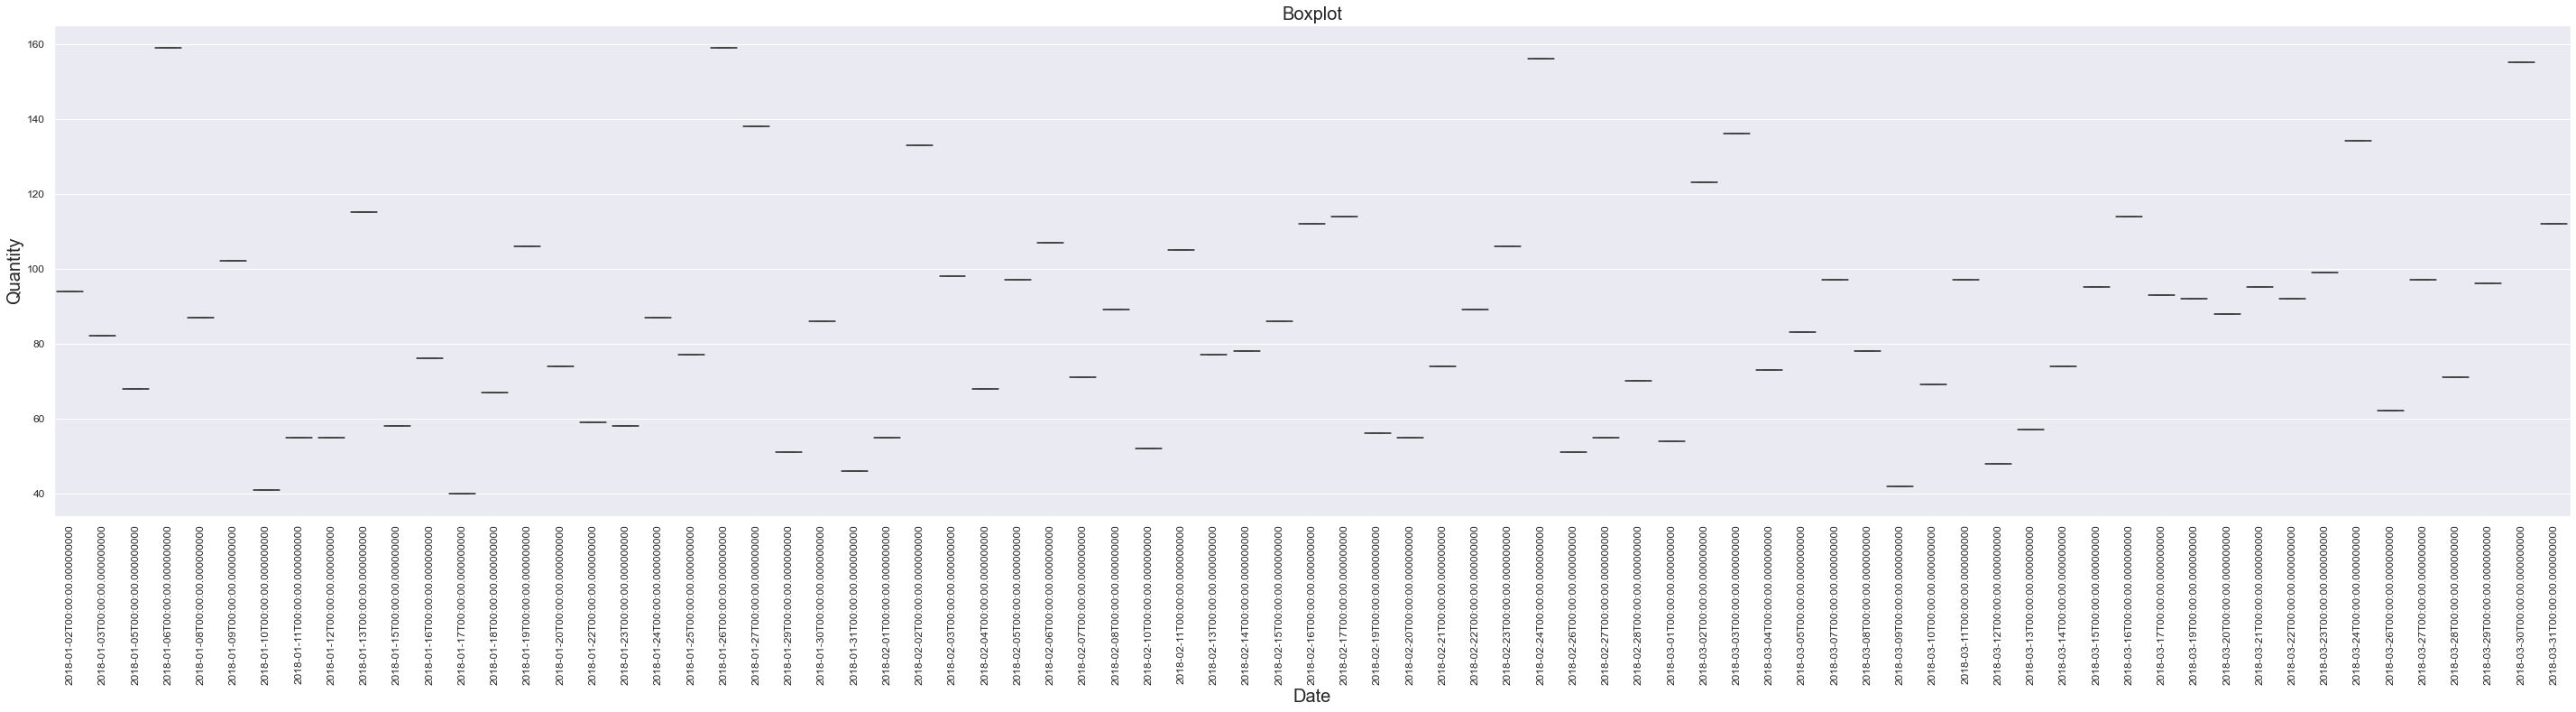

In [28]:
fig = plt.figure(figsize=(50,10))
sns.boxplot(x=pivot_table2.date, y=pivot_table2.quantity, data=pivot_table2)
plt.title("Boxplot", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Quantity", fontsize=20)

plt.show()

#### Python code done by Dennis Lam